In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from tqdm import tqdm

%matplotlib inline

In [2]:
class AlgorithmsDS:
    """ML algorithms."""
    
    errors_history = None
    weights_history = None
    weights = None

    def __init__(self):
        """Constructor."""

    def gd_fit(self, data, target, batch_size=32, eta=1e-02, max_iter=1000, min_weight_dist=1e-04, l1=0, l2=0):
        """Gradient descent algorithm."""
        
        self.weights = np.random.randn(data.shape[1])
        self.errors_history, self.weights_history = [], [self.weights]
        n_batches = len(target) // batch_size
        
        data = self.standartization(data)
        
        if len(data) % batch_size:
            n_batches += 1
            
        for i in tqdm(range(max_iter)):
            for batch_number in range(n_batches):
                data_batch = data[batch_number * batch_size: (batch_number + 1) * batch_size]
                target_batch = target[batch_number * batch_size: (batch_number + 1) * batch_size]
                
                target_pred = np.dot(self.weights, data_batch.T)
                current_error = self.calc_mse(target_batch, target_pred)
                
                self.weights -= 2 * eta * (np.sum(data_batch.T * (target_pred - target_batch), axis=1) / \
                                           len(target_pred) + l1 * np.sign(self.weights) + 2 * l1 * self.weights)
                
                self.errors_history.append(current_error)
                self.weights_history.append(self.weights.copy())
                
            if i > 2 and np.abs(current_error - self.errors_history[-2]) < min_weight_dist:
                break
                
        self.weights_history = np.array(self.weights_history)
        print(i, self.weights, current_error)

    @staticmethod
    def calc_mse(target, target_pred):
        """Mean squared error calculation."""

        err = np.mean((target - target_pred) ** 2)

        return err
                     
    @staticmethod
    def standartization(data):
        """Z-score data Normalization algorithm."""
        
        means = np.mean(data, axis=0)
        stds = np.std(data, axis=0)

        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                data[i][j] = (data[i][j] - means[j]) / stds[j]
                                           
        return data


### 1) Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [3]:
data, target = datasets.make_regression(n_samples=10000,
                                        n_features = 2,
                                        n_informative = 2,
                                        n_targets = 1,
                                        noise = 5,
                                        coef = False,
                                        random_state = 2)

In [4]:
gdc_obj_gd = AlgorithmsDS()
gdc_obj_gd.gd_fit(data, target, batch_size=data.shape[0])

 34%|██████████████████████████▎                                                  | 341/1000 [00:00<00:00, 3217.84it/s]

341 [47.20538719  1.65636027] 25.177129812498126


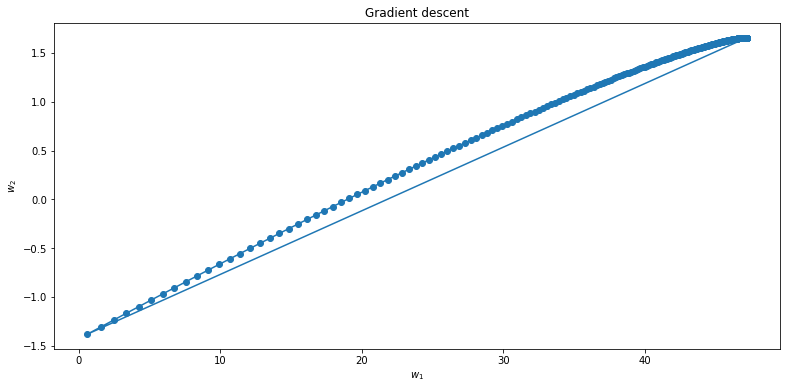

In [5]:
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.scatter(gdc_obj_gd.weights_history[:, 0], gdc_obj_gd.weights_history[:, 1])
plt.plot(gdc_obj_gd.weights_history[:, 0], gdc_obj_gd.weights_history[:, 1])
plt.show()

In [6]:
gdc_obj_sgd = AlgorithmsDS()
gdc_obj_sgd.gd_fit(data, target)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 106.15it/s]


999 [47.23360962  1.56683919] 37.14885473561876


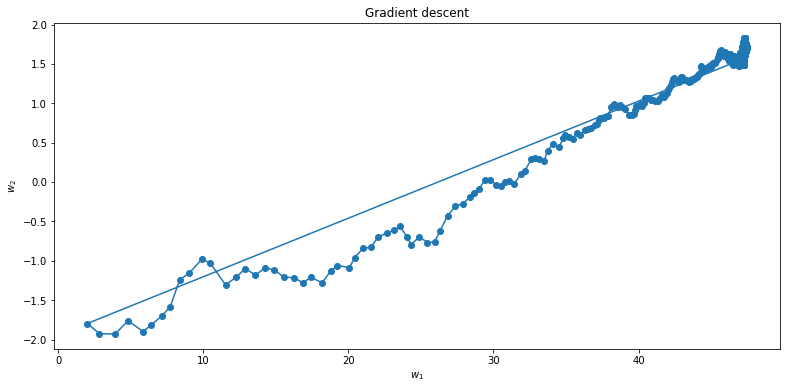

In [8]:
plt.figure(figsize=(13, 6))
plt.title('Gradient descent')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')
plt.scatter(gdc_obj_sgd.weights_history[:, 0], gdc_obj_sgd.weights_history[:, 1])
plt.plot(gdc_obj_sgd.weights_history[:, 0], gdc_obj_sgd.weights_history[:, 1])
plt.show()

(0.0, 400.0)

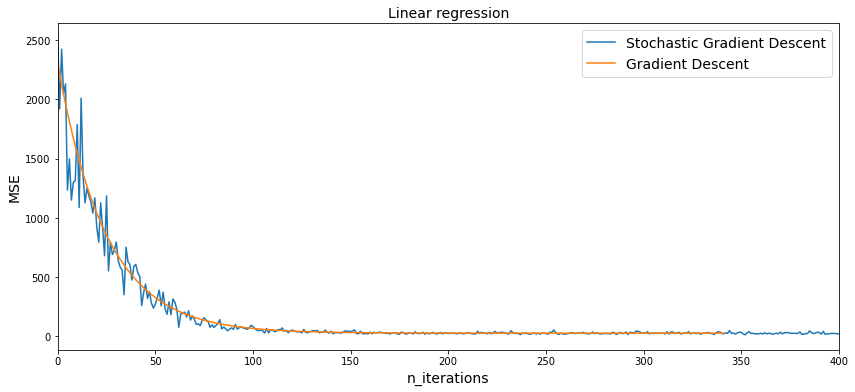

In [10]:
fig = plt.figure(figsize=(14, 6))
plt.title('Linear regression', size=14)
plt.plot(gdc_obj_sgd.errors_history, label='Stochastic Gradient Descent')
plt.plot(gdc_obj_gd.errors_history, label='Gradient Descent')
plt.legend(loc='best', fontsize=14)
plt.xlabel('n_iterations', size=14)
plt.ylabel('MSE', size=14)
plt.xlim(0,400)

### 2) Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

In [11]:
ridge_model = AlgorithmsDS()
ridge_model.gd_fit(data, target, l2=0.01)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:09<00:00, 105.34it/s]


999 [47.23360962  1.56683919] 37.14885473561877


### 3) Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.